This notebook has code to make Figure S2, and is mostly code from the jupyter notebook 'Making_multipanel_SI_plot' in the *master* branch (commit: 885c9b6a56...) of this Git repo. This was the code originally used to generate the spatial unmasking plot and the .csv file. 

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

In [3]:
%matplotlib notebook

In [4]:
folder = '../data/'
spatial_releasefn = pd.read_csv(folder+'spatial_release_fn.csv').iloc[:,1:]

temporalmasking_fn = pd.read_csv(folder+'temporal_masking_fn.csv').iloc[:,1:]


In [5]:
raw_data = pd.read_csv(folder+'Suemer_et_al_2009_fig4b.csv')
raw_data

,masker_angle,target_strength
0,0.035562,-36.923186
1,0.533428,-36.847795
2,1.031294,-39.695481
3,2.489331,-39.238429
4,4.978663,-39.553781
5,10.028449,-43.800088
6,15.007112,-51.815407
7,19.985775,-56.215341
8,21.977240,-63.067622


In [6]:
quadratic_coefs = np.polyfit(raw_data['masker_angle'], raw_data['target_strength'],deg=2)
quad_fit = np.poly1d(quadratic_coefs)
angular_separations = np.linspace(0,23,50) # the original code is some

In [7]:
np.diff(angular_separations)

array([0.46938776, 0.46938776, 0.46938776, 0.46938776, 0.46938776,
       0.46938776, 0.46938776, 0.46938776, 0.46938776, 0.46938776,
       0.46938776, 0.46938776, 0.46938776, 0.46938776, 0.46938776,
       0.46938776, 0.46938776, 0.46938776, 0.46938776, 0.46938776,
       0.46938776, 0.46938776, 0.46938776, 0.46938776, 0.46938776,
       0.46938776, 0.46938776, 0.46938776, 0.46938776, 0.46938776,
       0.46938776, 0.46938776, 0.46938776, 0.46938776, 0.46938776,
       0.46938776, 0.46938776, 0.46938776, 0.46938776, 0.46938776,
       0.46938776, 0.46938776, 0.46938776, 0.46938776, 0.46938776,
       0.46938776, 0.46938776, 0.46938776, 0.46938776])

In [8]:
smoothed_spatial_unmasking = quad_fit(angular_separations)

In [9]:
xylabel_fontsize = 8
xyticks_fontsize = 8
relative_x = 0.085
relative_y = 0.95

<IPython.core.display.Javascript object>


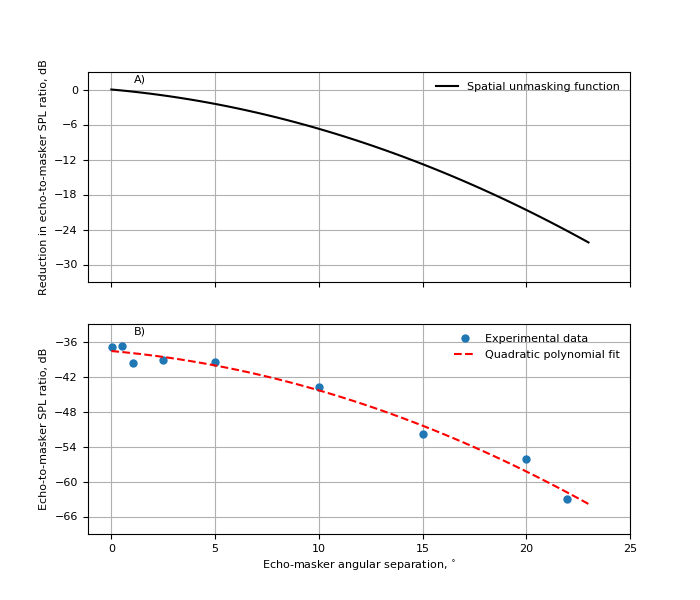

In [10]:
plt.figure(1, figsize=(7,6))


s1 = plt.subplot(211)
plt.plot(spatial_releasefn['deltatheta'],spatial_releasefn['dB_release'], 'k-',label='Spatial unmasking function' )
plt.ylabel('Reduction in echo-to-masker SPL ratio, dB', fontsize=xylabel_fontsize);
plt.yticks(np.arange(-30,6,6), fontsize=xyticks_fontsize) ;
plt.xticks(np.arange(0,30,5),[])
plt.ylim(-33,3)
plt.grid();
s1.text(relative_x, relative_y, 'A)', fontsize=xylabel_fontsize,
                   transform=s1.transAxes)
plt.legend(frameon=False, fontsize=xylabel_fontsize)

s2 = plt.subplot(212)
plt.plot(raw_data['masker_angle'], raw_data['target_strength'],'.', label='Experimental data',
                                         markersize=10)
plt.plot(angular_separations, smoothed_spatial_unmasking,'r--',
                                                    label='Quadratic polynomial fit')
plt.ylim(-69, -33)
plt.yticks(np.arange(-66,-30,6),fontsize=xyticks_fontsize)
plt.ylabel('Echo-to-masker SPL ratio, dB', fontsize=xylabel_fontsize);
s2.text(relative_x, relative_y, 'B)', fontsize=xylabel_fontsize,
                   transform=s2.transAxes)
plt.grid()
plt.legend(frameon=False, fontsize=xylabel_fontsize)
plt.xlabel('Echo-masker angular separation, $^{\circ}$', fontsize=xylabel_fontsize);
plt.xticks(np.arange(0,30,5), fontsize=xyticks_fontsize)


plt.savefig('Figure_S2_2panel_reduction.png', bbox_inches='tight',dpi=300)

The same figure above, but with the order of panels switched

<IPython.core.display.Javascript object>


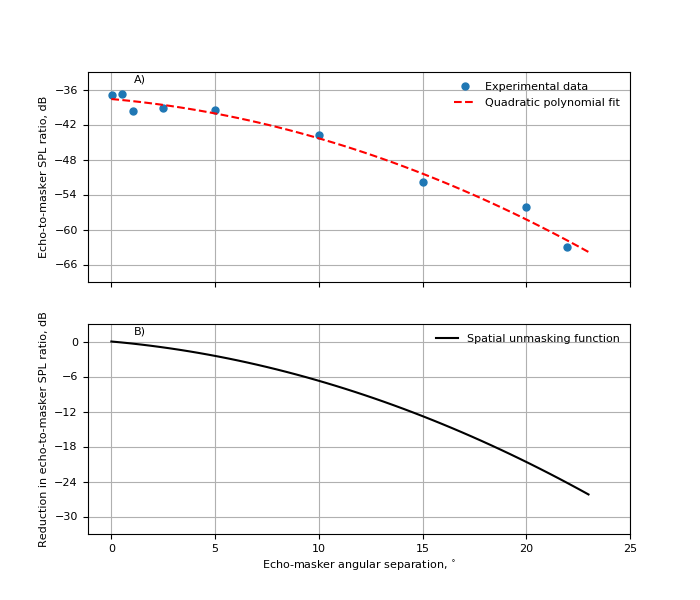

In [15]:
plt.figure(2, figsize=(7,6))


s1 = plt.subplot(212)
plt.plot(spatial_releasefn['deltatheta'],spatial_releasefn['dB_release'], 'k-',label='Spatial unmasking function' )
plt.ylabel('Reduction in echo-to-masker SPL ratio, dB', fontsize=xylabel_fontsize);
plt.yticks(np.arange(-30,6,6), fontsize=xyticks_fontsize) ;
plt.xticks(np.arange(0,30,5), fontsize=xyticks_fontsize)
plt.ylim(-33,3)
plt.grid();
s1.text(relative_x, relative_y, 'B)', fontsize=xylabel_fontsize,
                   transform=s1.transAxes)
plt.legend(frameon=False, fontsize=xylabel_fontsize)
plt.xlabel('Echo-masker angular separation, $^{\circ}$', fontsize=xylabel_fontsize);

s2 = plt.subplot(211)
plt.plot(raw_data['masker_angle'], raw_data['target_strength'],'.', label='Experimental data',
                                         markersize=10)
plt.plot(angular_separations, smoothed_spatial_unmasking,'r--',
                                                    label='Quadratic polynomial fit')
plt.ylim(-69, -33)
plt.yticks(np.arange(-66,-30,6),fontsize=xyticks_fontsize)
plt.ylabel('Echo-to-masker SPL ratio, dB', fontsize=xylabel_fontsize);
s2.text(relative_x, relative_y, 'A)', fontsize=xylabel_fontsize,
                   transform=s2.transAxes)
plt.grid()
plt.legend(frameon=False, fontsize=xylabel_fontsize)
plt.xticks(np.arange(0,30,5),[])

plt.savefig('Figure_S2_2panel_exptldata_on_top.png', bbox_inches='tight',dpi=300)